# Import Libraries and functions

In [4]:
import dill

In [5]:
# Import some libraries that will be used
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns

pd.set_option('display.max_columns', 300)

%matplotlib inline

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.svm import LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.ensemble import BaggingClassifier
import xgboost as xgb

import nltk
from nltk import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

import re
import string

import scipy
from textblob import TextBlob

from sklearn.decomposition import TruncatedSVD
from sklearn.metrics import classification_report
from sklearn.preprocessing import MinMaxScaler

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/alecmccabe/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/alecmccabe/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/alecmccabe/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [66]:
from tqdm import tqdm
tqdm.pandas()

/Users/alecmccabe/opt/anaconda3/lib/python3.8/site-packages/tqdm/std.py:668: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


In [67]:
import gensim

In [4]:
from gensim.models import Word2Vec
wv = gensim.models.KeyedVectors.load_word2vec_format("/Users/alecmccabe/Desktop/Flatiron/Projects/final_project_ideas/GoogleNews-vectors-negative300.bin.gz", binary=True)
wv.init_sims(replace=True)

In [5]:
import gensim
import spacy

nlp = spacy.blank('en')

# Loop through range of all indexes, get words associated with each index.
# The words in the keys list will correspond to the order of the google embed matrix
keys = []
for idx in range(3000000):
    keys.append(wv.index2word[idx])

# Set the vectors for our nlp object to the google news vectors
nlp.vocab.vectors = spacy.vocab.Vectors(data=wv.syn0, keys=keys)

<ipython-input-5-5779fac04ac5>:13: DeprecationWarning: Call to deprecated `syn0` (Attribute will be removed in 4.0.0, use self.vectors instead).
  nlp.vocab.vectors = spacy.vocab.Vectors(data=wv.syn0, keys=keys)


In [68]:
from nltk.stem import WordNetLemmatizer 
  
lemmatizer = WordNetLemmatizer()

In [69]:
#set stopwords and punctuations
stopwords = stopwords.words('english')
stopwords += list(string.punctuation)
stopwords += ["n't", "' '", "'re'","”","``","“","''","’","'s","'re","http","https","char",
              "reuters","wall","street","journal","photo"]

In [70]:
def black_txt(token):
    return  token not in stopwords and token not in list(string.punctuation)  and len(token)>3

def clean_txt(text, string = True):
    clean_text = []
    clean_text2 = []
    text = text.lower()
    text = re.sub("'", "",text)
    text = re.sub("\n", "",text)
    text = re.sub("(\\d|\\W)+"," ",text)
    text = re.sub('time magazine','',text)
    text = re.sub('breitbart','',text)
    text = re.sub('click','',text)
    
    clean_text = [ lemmatizer.lemmatize(word, pos="v") for word in word_tokenize(text) if black_txt(word)]
    clean_text2 = [word for word in clean_text if black_txt(word)]
    
    if string == True:
        return " ".join(clean_text2)
    else:
        return clean_text2

# Load data

In [7]:
#load in data
data = pd.read_csv('clean_data2.csv', index_col = 0)

FileNotFoundError: [Errno 2] File clean_data2.csv does not exist: 'clean_data2.csv'

In [84]:
data = pd.get_dummies(data,prefix='topic',columns=['dominant_topic'])

In [85]:
new_df = data.head(1).copy()

In [6]:
new_df.url

NameError: name 'new_df' is not defined

In [87]:
normalizer = pd.read_pickle('normalizer.pickle')
pipe = pd.read_pickle('pipeline.pickle')
model = pd.read_pickle('model.pickle')

In [88]:
train_vec = pipeline.transform(new_df)

In [89]:
pac_clf.predict(train_vec)[0]

'far_right'

In [54]:
from platform import python_version

print(python_version())

3.8.3


# Build Class Transformers, Pipeline

In [1]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import FeatureUnion
from sklearn.feature_extraction import DictVectorizer

In [2]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import FeatureUnion
from sklearn.feature_extraction import DictVectorizer
class ItemSelector(BaseEstimator, TransformerMixin):
    def __init__(self, key):
        self.key = key

    def fit(self, x, y=None):
        return self

    def transform(self, data_dict):
        return data_dict[self.key]

    
class TextStats(BaseEstimator, TransformerMixin):
    """Extract features from each document for DictVectorizer"""

    def fit(self, x, y=None):
        return self

    def transform(self, data):
        return [{'pol':  row['polarity'], 
                 'sub': row['subjectivity'],
                 'n_long_words': row['n_long_words'], 
                 'n_monosyllable_words': row['n_monosyllable_words'], 
                 'n_polysyllable_words': row['n_polysyllable_words'], 
                 'n_unique_words': row['n_unique_words'],
                 'coleman_index': row['coleman_index']} for _, row in data.iterrows()]

In [3]:
ItemSelector.__module__ = '__main__'

In [75]:
# from sklearn.base import BaseEstimator, TransformerMixin
# from sklearn.pipeline import FeatureUnion
# from sklearn.feature_extraction import DictVectorizer
# class ItemSelector(BaseEstimator, TransformerMixin):
#     def __init__(self, key):
#         self.key = key

#     def fit(self, x, y=None):
#         return self

#     def transform(self, data_dict):
#         return data_dict[self.key]

    
# class TextStats(BaseEstimator, TransformerMixin):
#     """Extract features from each document for DictVectorizer"""

#     def fit(self, x, y=None):
#         return self

#     def transform(self, data):
#         return [{'pol':  row['polarity'], 
#                  'sub': row['subjectivity'],
#                  'n_long_words': row['n_long_words'], 
#                  'n_monosyllable_words': row['n_monosyllable_words'], 
#                  'n_polysyllable_words': row['n_polysyllable_words'], 
#                  'n_unique_words': row['n_unique_words'],
#                  'coleman_index': row['coleman_index'],
#                 'topic_0': row['topic_0'],
#                 'topic_1': row['topic_1'],
#                 'topic_2': row['topic_2'],
#                 'topic_3': row['topic_3'],
#                 'topic_4': row['topic_4'],
#                 'topic_5': row['topic_5'],
#                 'topic_6': row['topic_6'],
#                 'topic_7': row['topic_7'],} for _, row in data.iterrows()]

In [78]:
pipeline = Pipeline([
    ('union', FeatureUnion(
        transformer_list=[

            # Pipeline for pulling features from the text
            ('text', Pipeline([
                ('selector', ItemSelector(key='predictor')),
                ('tfidf', TfidfVectorizer( min_df =3, max_df=0.2, max_features=None, 
                    strip_accents='unicode', analyzer='word',token_pattern=r'\w{1,}',
                    ngram_range=(1, 10), use_idf=1,smooth_idf=1,sublinear_tf=1,
                    stop_words = None, preprocessor=clean_txt)),
            ])),

            # Pipeline for pulling metadata features
            ('stats', Pipeline([
                ('selector', ItemSelector(key=['polarity', 
                                               'subjectivity', 
                                              'n_long_words',
                                              'n_monosyllable_words',
                                              'n_polysyllable_words',
                                              'n_unique_words',
                                               'coleman_index'])),
                ('stats', TextStats()),  # returns a list of dicts
                ('vect', DictVectorizer()),  # list of dicts -> feature matrix
            ])),

        ],

        # weight components in FeatureUnion
        transformer_weights={
            'text': 0.9,
            'stats': 1.5,
        },
    ))
])

In [79]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
seed = 40
X = data[['predictor', 'polarity', 'subjectivity','n_long_words','n_monosyllable_words',
         'n_polysyllable_words','n_unique_words','coleman_index']]

y = data['target']
# encoder = LabelEncoder()
# y = encoder.fit_transform(y)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed, stratify=y)

In [80]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
seed = 40
X = data[['predictor', 'polarity', 'subjectivity','n_long_words','n_monosyllable_words',
         'n_polysyllable_words','n_unique_words','coleman_index','topic_0','topic_1','topic_2','topic_3',
         'topic_4','topic_5','topic_6','topic_7']]

y =data['target']
# encoder = LabelEncoder()
# y = encoder.fit_transform(y)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed, stratify=y)

In [81]:
pipeline.fit(x_train)

Pipeline(steps=[('union',
                 FeatureUnion(transformer_list=[('text',
                                                 Pipeline(steps=[('selector',
                                                                  ItemSelector(key='predictor')),
                                                                 ('tfidf',
                                                                  TfidfVectorizer(max_df=0.2,
                                                                                  min_df=3,
                                                                                  ngram_range=(1,
                                                                                               10),
                                                                                  preprocessor=<function clean_txt at 0x133a2c9d0>,
                                                                                  smooth_idf=1,
                                                      

In [ ]:
dill.dump(pipeline, open('pipeline.dill', mode='wb'))

In [91]:
import pickle
with open('pipeline.pickle', 'wb') as f:
    pickle.dump(pipeline, f)

In [22]:
%%time
train_vec = pipeline.transform(x_train)
test_vec = pipeline.transform(x_test)
print("Checking that the number of features in train and test correspond: %s - %s" % (train_vec.shape, test_vec.shape))

Checking that the number of features in train and test correspond: (12588, 1307212) - (3147, 1307212)
CPU times: user 2min 30s, sys: 6.21 s, total: 2min 36s
Wall time: 3min


# Test different models

In [23]:
from sklearn.metrics import plot_confusion_matrix

In [24]:
results = pd.DataFrame(columns = ['model','accuracy'])
results

,model,accuracy


In [25]:
new_row = {'model': 'Dummy', 'accuracy': .29173}
results = results.append(new_row, ignore_index=True)
results

,model,accuracy
0,Dummy,0.29173


------------

In [ ]:
#Logistic Regression
logreg = LogisticRegressionCV(max_iter=1000, cv=5, verbose=1, n_jobs=-1) 
logreg.fit(train_vec, y_train)
test_preds = logreg.predict(test_vec)

accuracy = accuracy_score(y_test, test_preds)

new_row = {'model': 'Logreg', 'accuracy': accuracy}
results = results.append(new_row, ignore_index=True)
results

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


In [ ]:
plot_confusion_matrix(logreg,test_vec,y_test)

------------

In [26]:
#Linear Support Vector Machines
sv_clf = LinearSVC(C=1, class_weight='balanced', multi_class='ovr', random_state=40,verbose=3) 
sv_clf.fit(train_vec, y_train)
test_preds = sv_clf.predict(test_vec)

accuracy = accuracy_score(y_test, test_preds)

new_row = {'model': 'SVM', 'accuracy': accuracy}
results = results.append(new_row, ignore_index=True)
results

[LibLinear]

,model,accuracy
0,Dummy,0.291730
1,SVM,0.884017


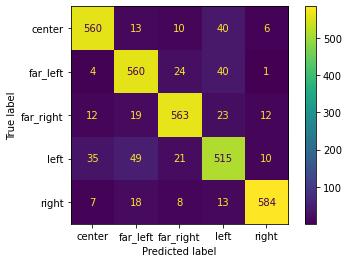

In [27]:
plot_confusion_matrix(sv_clf,test_vec,y_test)

------------

In [28]:
#Random Forest - best so far is 500 trees with sqrt max features
rfc_clf = RandomForestClassifier(n_estimators=500,max_features='sqrt',random_state=0,n_jobs=-1,verbose=1)
rfc_clf.fit(train_vec, y_train)
test_preds = rfc_clf.predict(test_vec)

accuracy = accuracy_score(y_test, test_preds)

new_row = {'model': 'RFC', 'accuracy': accuracy}
results = results.append(new_row, ignore_index=True)
results

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   15.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  3.0min finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.9s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    1.9s
[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:    2.2s finished


,model,accuracy
0,Dummy,0.291730
1,SVM,0.884017
2,RFC,0.820146


[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.9s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    1.9s
[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:    2.2s finished


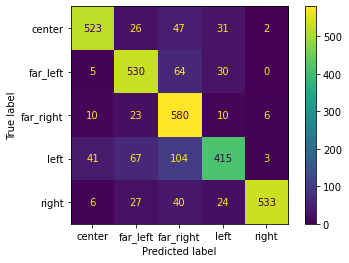

In [29]:
plot_confusion_matrix(rfc_clf,test_vec,y_test)

------------

In [30]:
#Multinomial Bayes
mnb_lemma = MultinomialNB(alpha = 0)
mnb_lemma.fit(train_vec, y_train)
test_preds = mnb_lemma.predict(test_vec)

accuracy = accuracy_score(y_test, test_preds)

new_row = {'model': 'MNB', 'accuracy': accuracy}
results = results.append(new_row, ignore_index=True)
results

/Users/alecmccabe/opt/anaconda3/lib/python3.8/site-packages/sklearn/naive_bayes.py:511: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn('alpha too small will result in numeric errors, '


,model,accuracy
0,Dummy,0.291730
1,SVM,0.884017
2,RFC,0.820146
3,MNB,0.765173


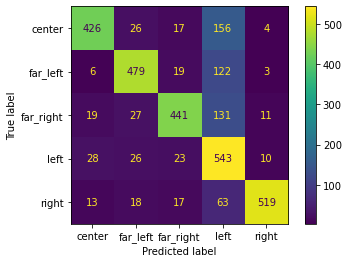

In [31]:
plot_confusion_matrix(mnb_lemma,test_vec,y_test)

----------

In [32]:
#Passive Aggressive Classifier
pac_clf = PassiveAggressiveClassifier(C = 5, random_state=0)
pac_clf.fit(train_vec, y_train)
test_preds = pac_clf.predict(test_vec)

accuracy = accuracy_score(y_test, test_preds)

new_row = {'model': 'PAC', 'accuracy': accuracy}
results = results.append(new_row, ignore_index=True)
results

,model,accuracy
0,Dummy,0.291730
1,SVM,0.884017
2,RFC,0.820146
3,MNB,0.765173
4,PAC,0.888147


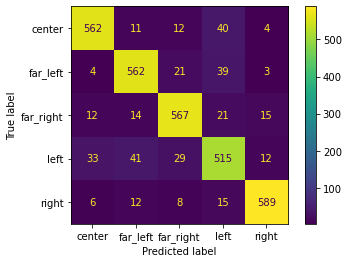

In [33]:
plot_confusion_matrix(pac_clf,test_vec,y_test)

In [90]:
with open('model.pickle', 'wb') as f:
    pickle.dump(pac_clf, f)

-----

In [31]:
from sklearn.linear_model import LogisticRegression

In [33]:
#bagging classifier
bc_lr = BaggingClassifier(
            base_estimator=PassiveAggressiveClassifier(C = 5, random_state=0),
    n_estimators= 100,
    oob_score= True,bootstrap_features=True)

bc_lr.fit(train_vec, y_train)
test_preds = bc_lr.predict(test_vec)

accuracy = accuracy_score(y_test, test_preds)

new_row = {'model': 'Bag', 'accuracy': accuracy}
results = results.append(new_row, ignore_index=True)
results


,model,accuracy
0,Dummy,0.291730
1,SVM,0.883699
2,RFC,0.815062
3,MNB,0.766762
4,PAC,0.885923
5,Bag,0.879568


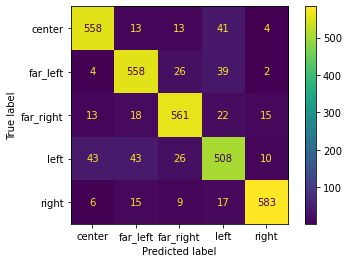

In [35]:
plot_confusion_matrix(bc_lr,test_vec,y_test)

-----

In [36]:
#XGBoost
xg_clf = xgb.XGBClassifier(objective ='multi:softmax', 
                           booster='gbtree',
                           colsample_bytree = .1, 
                           subsample = .1,
                           learning_rate = 0.5,
                           max_depth = 1,
                           min_child_weight=10,
                           alpha = 5,
                           gamma = .1,
                           n_estimators = 1500,
                          random_state=0)

xg_clf.fit(train_vec, y_train)
test_preds = xg_clf.predict(test_vec)

accuracy = accuracy_score(y_test, test_preds)

new_row = {'model': 'XGB', 'accuracy': accuracy}
results = results.append(new_row, ignore_index=True)
results

,model,accuracy
0,Dummy,0.291730
1,SVM,0.883699
2,RFC,0.815062
3,MNB,0.766762
4,PAC,0.885923
5,Bag,0.879568
6,XGB,0.740388


**Test out Word2Vec**

In [38]:
class SpacyVectorTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, nlp):
        self.nlp = nlp
        self.dim = 300

    def fit(self, X, y):
        return self

    def transform(self, X):
        # Doc.vector defaults to an average of the token vectors.
        # https://spacy.io/api/doc#vector
        
        return [self.nlp(text).vector for text in X]

In [39]:
X = data['predictor']
y =data['target']
encoder = LabelEncoder()
y = encoder.fit_transform(y)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed, stratify=y)

In [40]:
embeddings_pipeline = Pipeline(
    steps=[
        ("mean_embeddings", SpacyVectorTransformer(nlp)),
        ("reduce_dim", TruncatedSVD(50)),
        ("classifier", PassiveAggressiveClassifier(C=5,random_state=0,n_jobs=-1, verbose=1)),
    ]
)
embeddings_pipeline.fit(x_train, y_train)
y_pred = embeddings_pipeline.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)

new_row = {'model': 'word2vec', 'accuracy': accuracy}
results = results.append(new_row, ignore_index=True)
results


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.2s finished


-- Epoch 1-- Epoch 1-- Epoch 1
-- Epoch 1

-- Epoch 1

Norm: 91.65, NNZs: 50, Bias: -11.415791, T: 12588, Avg. loss: 1.122597Norm: 104.54, NNZs: 50, Bias: -0.750467, T: 12588, Avg. loss: 1.114578
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 122.22, NNZs: 50, Bias: -6.690065, T: 12588, Avg. loss: 0.987945Norm: 160.67, NNZs: 50, Bias: -1.083672, T: 12588, Avg. loss: 0.817308Norm: 116.41, NNZs: 50, Bias: 4.804773, T: 12588, Avg. loss: 1.095224
Total training time: 0.00 seconds.
-- Epoch 2

Total training time: 0.00 seconds.
-- Epoch 2
Total training time: 0.01 seconds.
-- Epoch 2

Total training time: 0.01 seconds.
-- Epoch 2

Norm: 137.11, NNZs: 50, Bias: -11.562388, T: 25176, Avg. loss: 1.116614Norm: 216.30, NNZs: 50, Bias: -3.212374, T: 25176, Avg. loss: 0.540167
Total training time: 0.01 seconds.

Total training time: 0.01 seconds.
-- Epoch 3
-- Epoch 3
Norm: 149.64, NNZs: 50, Bias: -0.935779, T: 25176, Avg. loss: 1.023037Norm: 166.36, NNZs: 50, Bias: -3.002112, T: 25176, Avg. 

,model,accuracy
0,Dummy,0.291730
1,SVM,0.883699
2,RFC,0.815062
3,MNB,0.766762
4,PAC,0.885923
5,Bag,0.879568
6,XGB,0.740388
7,word2vec,0.559898


**Deep Learning, Spacy**

In [41]:
from keras.preprocessing.text import Tokenizer
from keras.models import Sequential
from keras.layers import Activation, Dense, Dropout, LSTM, Embedding
from sklearn.preprocessing import LabelBinarizer
from keras.preprocessing.text import Tokenizer, text_to_word_sequence
from keras.preprocessing.sequence import pad_sequences
from keras.utils import np_utils
from keras.layers import Dense, Input, LSTM, Bidirectional, Activation, Conv1D, GRU, TimeDistributed
from keras.layers import Dropout, Embedding, GlobalMaxPooling1D, MaxPooling1D, Add, Flatten, SpatialDropout1D
from keras.layers import GlobalAveragePooling1D, BatchNormalization, concatenate
from keras.layers import Reshape, merge, Concatenate, Lambda, Average
from keras import backend as K
from keras.engine.topology import Layer
from keras import initializers, regularizers, constraints

In [42]:
from sklearn.model_selection import train_test_split
import time
X = data['predictor']
y =data['target']
encoder = LabelEncoder()
y = encoder.fit_transform(y)
Y = np_utils.to_categorical(y)
##Create the tf-idf vector
vectorizer = TfidfVectorizer( min_df =3, max_df=0.2, max_features=None, 
            strip_accents='unicode', analyzer='word',token_pattern=r'\w{1,}',
            use_idf=1,smooth_idf=1,sublinear_tf=1,
            stop_words = None, preprocessor=clean_txt)

In [49]:
seed = 40
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=seed, stratify =y)
vectorizer.fit(x_train)

TfidfVectorizer(max_df=0.2, min_df=3,
                preprocessor=<function clean_txt at 0x2419d1c10>, smooth_idf=1,
                strip_accents='unicode', sublinear_tf=1,
                token_pattern='\\w{1,}', use_idf=1)

In [50]:
word2idx = {word: idx for idx, word in enumerate(vectorizer.get_feature_names())}
tokenize = vectorizer.build_tokenizer()
preprocess = vectorizer.build_preprocessor()
 
def to_sequence(tokenizer, preprocessor, index, text):
    words = tokenizer(preprocessor(text))
    indexes = [index[word] for word in words if word in index]
    return indexes

X_train_sequences = [to_sequence(tokenize, preprocess, word2idx, x) for x in x_train]
print(X_train_sequences[0])

[16093, 11973, 15382, 26137, 23197, 16093, 16756, 15534, 4104, 16929, 9816, 22035, 21151, 11973, 15382, 26137, 20298, 16439, 19223, 23197, 13746, 23197, 1872, 7673, 1705, 19000, 1527, 25205, 2635, 12288, 23847, 23883, 9801, 21613, 19570, 19647, 9815, 4651, 19890, 21338, 21151, 23883, 20298, 6666, 16092, 262, 16208, 23557, 21074, 20298, 8360, 17804, 22085, 21074, 15586, 22007, 4374, 9828, 7694, 13907, 18027, 6385, 23197, 19223, 25831, 19696, 16093, 12382, 15534, 13639, 6387, 1521, 21151, 22882, 15351, 13663, 18148, 21151, 8089, 183, 16095, 13896, 23136, 20298, 6387, 16929, 9828, 18866, 15042, 11717, 19137, 5562, 11307, 1226, 6010, 14504, 26137, 3930, 13895, 21679, 23653, 72, 7666, 18555, 12071, 21338, 11363, 22479, 26289, 16756, 14269, 18635, 20298, 17804, 26345, 21074, 1527, 21338, 1030, 4558, 23653, 25697, 6388, 23173, 8008, 17802, 22454, 21970, 14504, 6387, 9829, 21613, 6103, 20298, 13895, 10581, 17975, 23096, 4410, 21338, 26591, 7393, 3323, 14504, 21074, 5361, 24153, 9829, 21613, 21

In [51]:
# Compute the max lenght of a text

MAX_SEQ_LENGHT=60

N_FEATURES = len(vectorizer.get_feature_names())
X_train_sequences = pad_sequences(X_train_sequences, maxlen=MAX_SEQ_LENGHT, value=N_FEATURES)
print(X_train_sequences[0])

[13895 21679 23653    72  7666 18555 12071 21338 11363 22479 26289 16756
 14269 18635 20298 17804 26345 21074  1527 21338  1030  4558 23653 25697
  6388 23173  8008 17802 22454 21970 14504  6387  9829 21613  6103 20298
 13895 10581 17975 23096  4410 21338 26591  7393  3323 14504 21074  5361
 24153  9829 21613 21338 15382 12275  1798  9828 23084 17233  1325 18608]


In [52]:
X_test_sequences = [to_sequence(tokenize, preprocess, word2idx, x) for x in x_test]
X_test_sequences = pad_sequences(X_test_sequences, maxlen=MAX_SEQ_LENGHT, value=N_FEATURES)

In [53]:
EMBEDDINGS_LEN = 300

embeddings_index = np.zeros((len(vectorizer.get_feature_names()) + 1, EMBEDDINGS_LEN))
for word, idx in word2idx.items():
    try:
        embedding = nlp.vocab[word].vector
        embeddings_index[idx] = embedding
    except:
        pass
      
print("EMBEDDINGS_LEN=", EMBEDDINGS_LEN)

EMBEDDINGS_LEN= 300


In [54]:
model = Sequential()
model.add(Embedding(len(vectorizer.get_feature_names()) + 1,
                    EMBEDDINGS_LEN,  # Embedding size
                    weights=[embeddings_index],
                    input_length=MAX_SEQ_LENGHT,
                    trainable=False))
model.add(LSTM(300, dropout=0.2))
model.add(Dense(len(set(y)), activation='softmax'))
 
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 60, 300)           8068200   
_________________________________________________________________
lstm (LSTM)                  (None, 300)               721200    
_________________________________________________________________
dense (Dense)                (None, 5)                 1505      
Total params: 8,790,905
Trainable params: 722,705
Non-trainable params: 8,068,200
_________________________________________________________________
None


In [56]:
model.fit(X_train_sequences, y_train, 
          epochs=5, batch_size=128, verbose=1, 
          validation_split=0.1)
 
scores = model.evaluate(X_test_sequences, y_test, verbose=1)
print("Accuracy:", scores[1])


Epoch 1/5
89/89 [==============================] - 20s 226ms/step - loss: 1.0855 - accuracy: 0.5667 - val_loss: 1.1089 - val_accuracy: 0.5449
Epoch 2/5
89/89 [==============================] - 21s 236ms/step - loss: 1.0427 - accuracy: 0.5865 - val_loss: 1.0584 - val_accuracy: 0.5655
Epoch 3/5
89/89 [==============================] - 22s 243ms/step - loss: 1.0156 - accuracy: 0.5982 - val_loss: 1.0580 - val_accuracy: 0.5687
Epoch 4/5
89/89 [==============================] - 22s 251ms/step - loss: 0.9774 - accuracy: 0.6145 - val_loss: 1.0135 - val_accuracy: 0.5878
Epoch 5/5
99/99 [==============================] - 4s 38ms/step - loss: 1.0521 - accuracy: 0.5821
Accuracy: 0.5821416974067688


In [57]:
accuracy = scores[1]

new_row = {'model': 'LSTM-Simple', 'accuracy': accuracy}
results = results.append(new_row, ignore_index=True)
results

,model,accuracy
0,Dummy,0.291730
1,SVM,0.883699
2,RFC,0.815062
3,MNB,0.766762
4,PAC,0.885923
5,Bag,0.879568
6,XGB,0.740388
7,word2vec,0.559898
8,LSTM-Simple,0.582142


**LSTM with new features**

In [63]:
from keras.models import Model
from keras.layers import Dense ,LSTM,concatenate,Input,Flatten,BatchNormalization, GRU

text_data = Input(shape=(MAX_SEQ_LENGHT,), name='text')
meta_data = Input(shape=(10,), name = 'meta')
x=(Embedding(len(vectorizer.get_feature_names()) + 1,
                    EMBEDDINGS_LEN,  # Embedding size
                    weights=[embeddings_index],
                    input_length=MAX_SEQ_LENGHT,
                    trainable=False))(text_data)
x2 = ((LSTM(300, dropout=0.2, recurrent_dropout=0.2)))(x)
x4 = concatenate([x2, meta_data])
x5 = Dense(150, activation='relu')(x4)
x6 = Dropout(0.25)(x5)
x7 = BatchNormalization()(x6)
out=(Dense(len(set(y)), activation="softmax"))(x7)
model = Model(inputs=[text_data, meta_data ], outputs=out)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "functional_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
text (InputLayer)               [(None, 60)]         0                                            
__________________________________________________________________________________________________
embedding_2 (Embedding)         (None, 60, 300)      8068200     text[0][0]                       
__________________________________________________________________________________________________
lstm_2 (LSTM)                   (None, 300)          721200      embedding_2[0][0]                
__________________________________________________________________________________________________
meta (InputLayer)               [(None, 10)]         0                                            
_______________________________________________________________________________________

In [64]:
df_cat_train = data.iloc[x_train.index][['polarity', 'subjectivity', 'topic_0',
                                        'topic_1',
                                        'topic_2',
                                        'topic_3',
                                        'topic_4',
                                        'topic_5',
                                        'topic_6',
                                        'topic_7']]
df_cat_test = data.iloc[x_test.index][['polarity', 'subjectivity', 'topic_0',
                                        'topic_1',
                                        'topic_2',
                                        'topic_3',
                                        'topic_4',
                                        'topic_5',
                                        'topic_6',
                                        'topic_7']]

In [65]:
model.fit([X_train_sequences, df_cat_train], y_train, 
          epochs=12, batch_size=128, verbose=1, 
          validation_split=0.1)
 
scores = model.evaluate([X_test_sequences, df_cat_test],y_test, verbose=1)
print("Accuracy:", scores[1])  

Epoch 1/12
89/89 [==============================] - 32s 357ms/step - loss: 1.4565 - accuracy: 0.4052 - val_loss: 1.5224 - val_accuracy: 0.4146
Epoch 2/12
89/89 [==============================] - 34s 383ms/step - loss: 1.2258 - accuracy: 0.5048 - val_loss: 1.4527 - val_accuracy: 0.4909
Epoch 3/12
89/89 [==============================] - 35s 393ms/step - loss: 1.1301 - accuracy: 0.5474 - val_loss: 1.3936 - val_accuracy: 0.4956
Epoch 4/12
89/89 [==============================] - 37s 412ms/step - loss: 1.0533 - accuracy: 0.5788 - val_loss: 1.2851 - val_accuracy: 0.5616
Epoch 5/12
89/89 [==============================] - 38s 430ms/step - loss: 0.9924 - accuracy: 0.6074 - val_loss: 1.1767 - val_accuracy: 0.5631
Epoch 6/12
89/89 [==============================] - 37s 415ms/step - loss: 0.9471 - accuracy: 0.6287 - val_loss: 1.0598 - val_accuracy: 0.5830
Epoch 7/12
89/89 [==============================] - 37s 417ms/step - loss: 0.8962 - accuracy: 0.6517 - val_loss: 1.0291 - val_accuracy: 0.6044

In [66]:
accuracy = scores[1]

new_row = {'model': 'LSTM-MetaFeatures', 'accuracy': accuracy}
results = results.append(new_row, ignore_index=True)
results

,model,accuracy
0,Dummy,0.291730
1,SVM,0.883699
2,RFC,0.815062
3,MNB,0.766762
4,PAC,0.885923
5,Bag,0.879568
6,XGB,0.740388
7,word2vec,0.559898
8,LSTM-Simple,0.582142
9,LSTM-MetaFeatures,0.642517


In [67]:
results = results.sort_values(by='accuracy', ascending=True)
results.reset_index(drop=True, inplace=True)

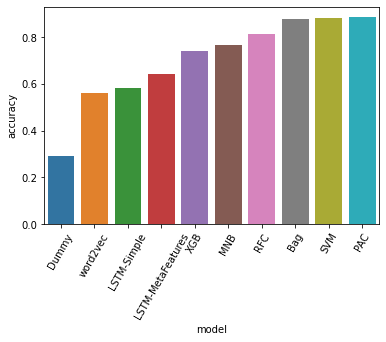

In [68]:
ax = sns.barplot(x=results.model, y=results.accuracy, data=results)
l = ax.set_xticklabels(ax.get_xticklabels(), rotation=60)
plt.show()